In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-dataset/student_performance_data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [3]:
student_data = pd.read_csv('/kaggle/input/student-performance-dataset/student_performance_data.csv')


In [4]:
student_data.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [6]:
student_data.describe(include='all')


,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
count,500.000000,500,500.000000,500.000000,500.000000,500.00000,500,500,500
unique,NaN,2,NaN,NaN,NaN,NaN,5,2,2
top,NaN,Female,NaN,NaN,NaN,NaN,Business,Yes,No
freq,NaN,256,NaN,NaN,NaN,NaN,114,268,260
mean,250.500000,NaN,20.956000,19.876000,74.990380,2.98516,NaN,NaN,NaN
std,144.481833,NaN,2.000517,11.471347,14.565917,0.56362,NaN,NaN,NaN
min,1.000000,NaN,18.000000,1.000000,50.010000,2.00000,NaN,NaN,NaN
25%,125.750000,NaN,19.000000,10.000000,62.607500,2.48750,NaN,NaN,NaN
50%,250.500000,NaN,21.000000,20.500000,75.730000,3.00000,NaN,NaN,NaN
75%,375.250000,NaN,23.000000,30.000000,87.220000,3.48000,NaN,NaN,NaN


In [7]:
student_data.isnull().sum(axis=0)

StudentID                    0
Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

In [8]:
student_data.shape

(500, 9)

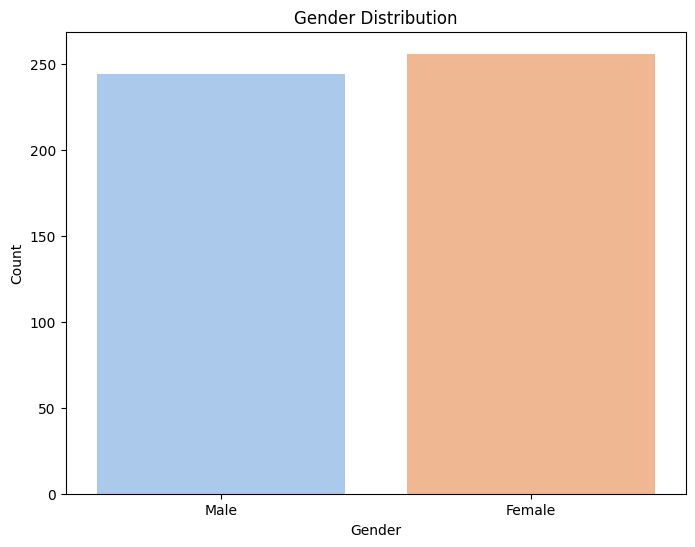

In [9]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=student_data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

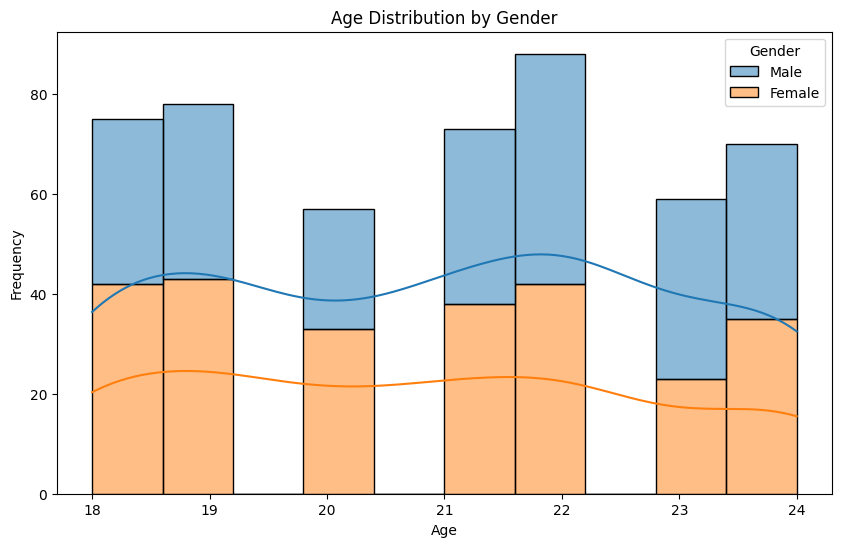

In [10]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=student_data, x='Age', hue='Gender', multiple='stack', bins=10, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

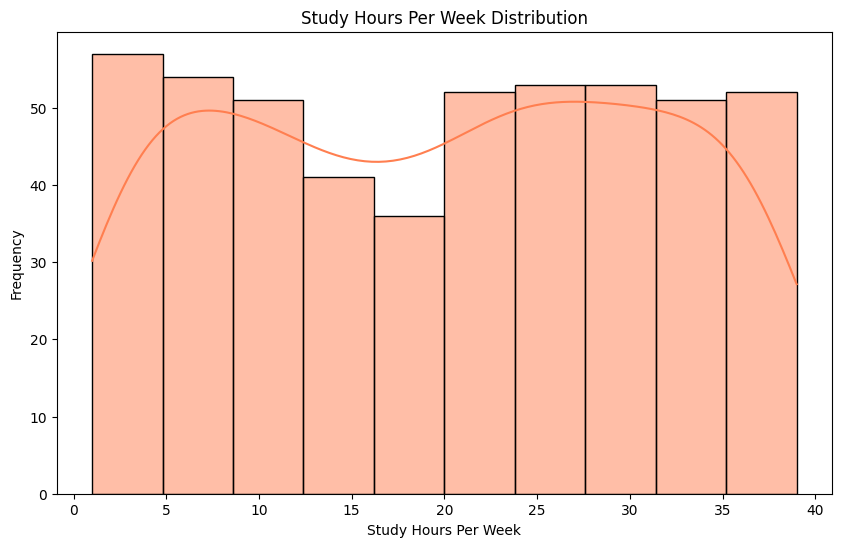

In [11]:
# Study hours per week distribution
plt.figure(figsize=(10, 6))
sns.histplot(student_data['StudyHoursPerWeek'], bins=10, kde=True, color='coral')
plt.title('Study Hours Per Week Distribution')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.show()

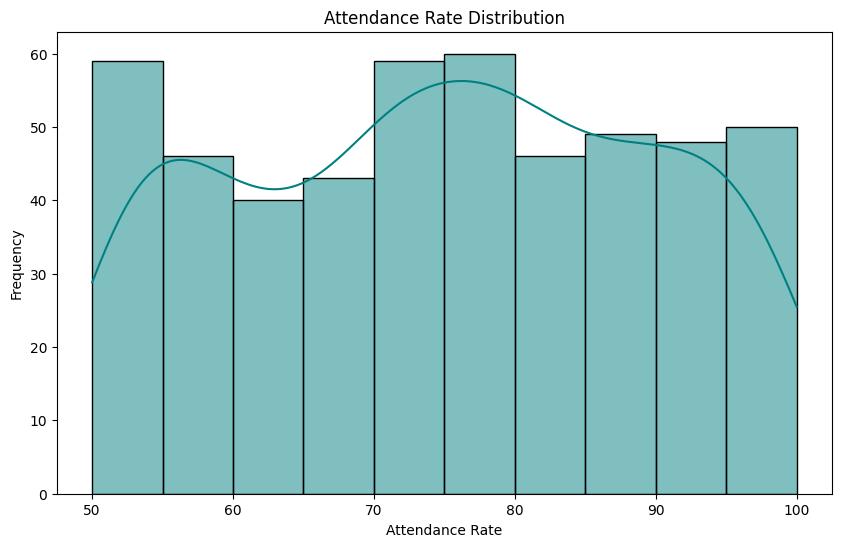

In [12]:
# Attendance rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(student_data['AttendanceRate'], bins=10, kde=True, color='teal')
plt.title('Attendance Rate Distribution')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')
plt.show()

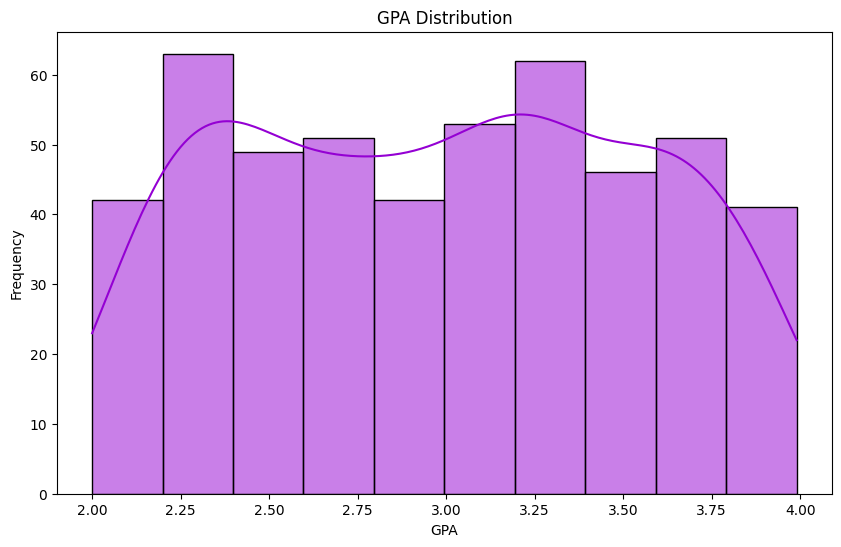

In [13]:
# GPA distribution
plt.figure(figsize=(10, 6))
sns.histplot(student_data['GPA'], bins=10, kde=True, color='darkviolet')
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

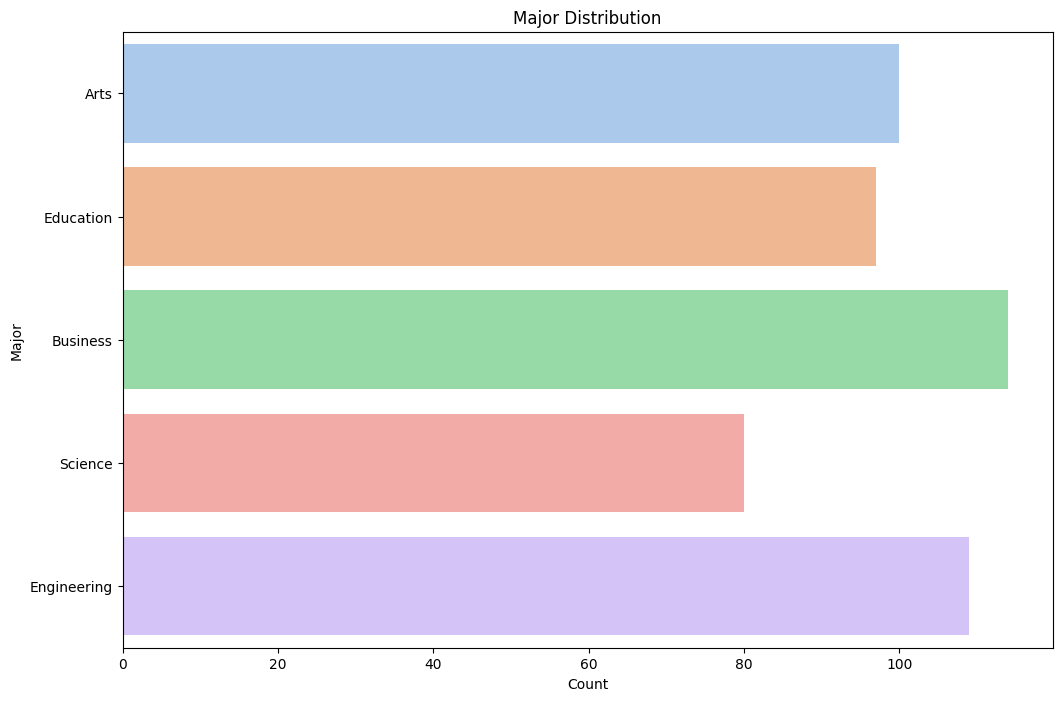

In [14]:
# Major distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Major', data=student_data, palette='pastel')
plt.title('Major Distribution')
plt.xlabel('Count')
plt.ylabel('Major')
plt.show()

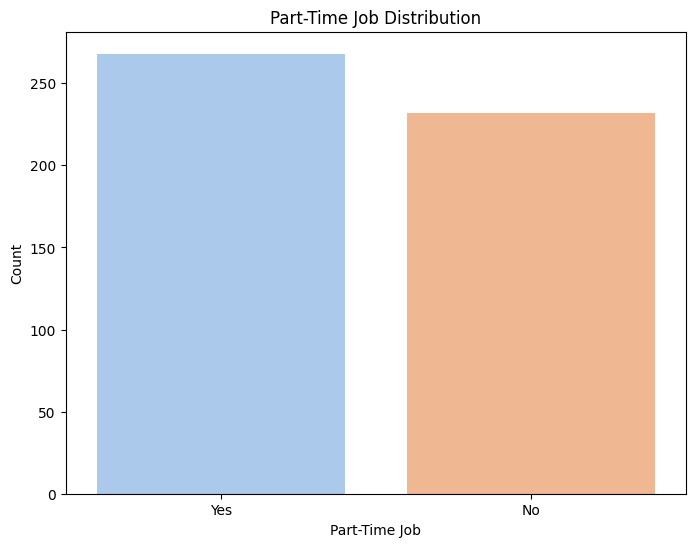

In [15]:
# Part-time job distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='PartTimeJob', data=student_data, palette='pastel')
plt.title('Part-Time Job Distribution')
plt.xlabel('Part-Time Job')
plt.ylabel('Count')
plt.show()

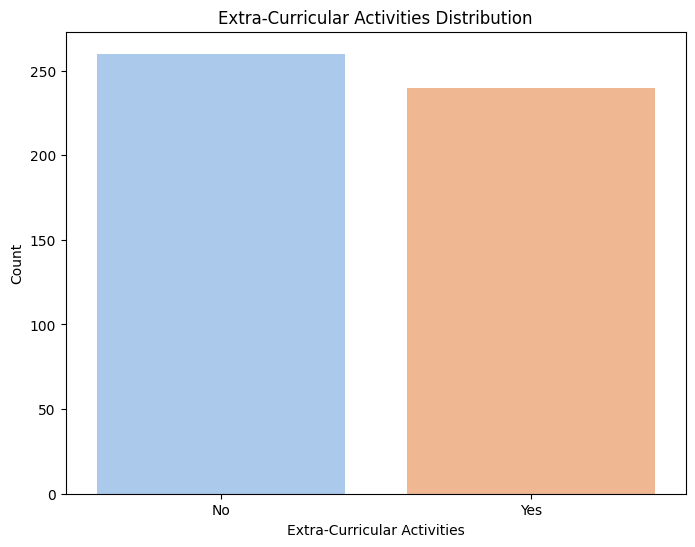

In [16]:
# Extra-curricular activities distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='ExtraCurricularActivities', data=student_data, palette='pastel')
plt.title('Extra-Curricular Activities Distribution')
plt.xlabel('Extra-Curricular Activities')
plt.ylabel('Count')
plt.show()

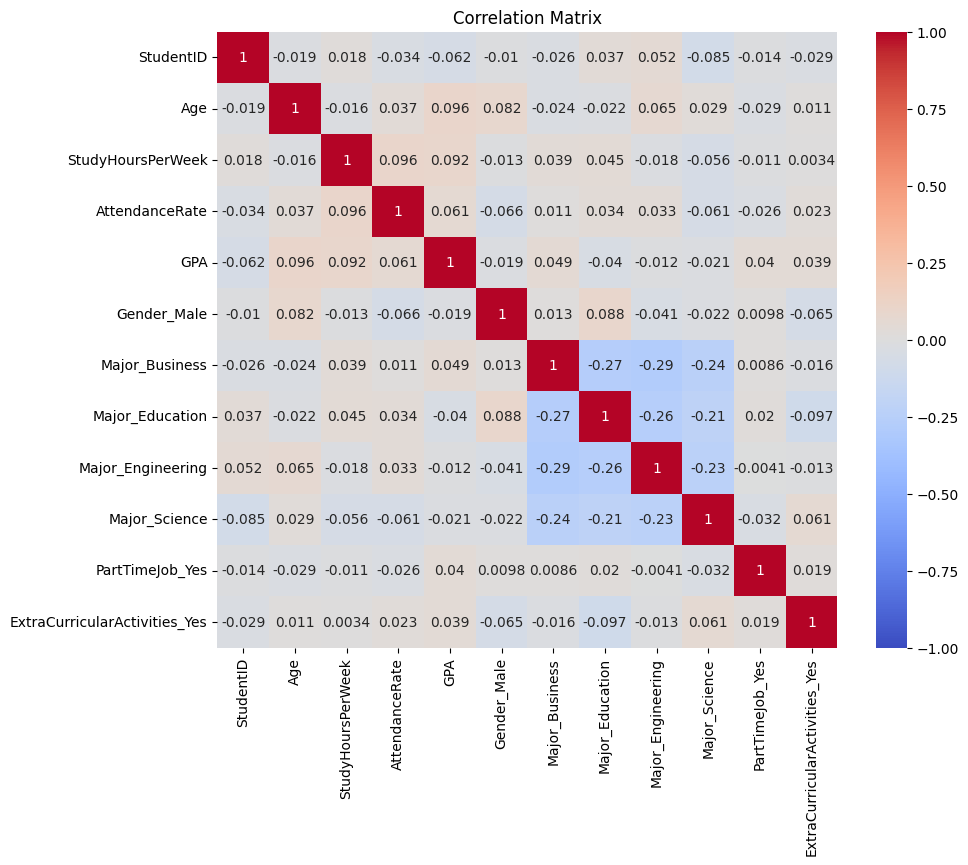

In [17]:
# Perform one-hot encoding
encoder = OneHotEncoder(drop='first')
categorical_features = ['Gender', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']
encoded_features = pd.DataFrame(encoder.fit_transform(student_data[categorical_features]).toarray(), 
                                columns=encoder.get_feature_names_out(categorical_features))

# Combine encoded features with original numerical features
numerical_features = student_data.drop(categorical_features, axis=1)
student_data_encoded = pd.concat([numerical_features.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
corr = student_data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()